# Assignment 2 (Solution)
## Programming for Data Science (BUAN 6340)

### <font color='red'>Due Date: Oct 20, 2019 11:59pm</font> 

Deliverables:

- Write down your codes in the given cells described in this file, denoted as "YOUR CODES"
- Use "download as" in the "file" menu to convert your ipython file to a .html file
- Submit both .ipynb and .html files to the eLearning (you might need to compress them into one single file)


This assignment covers data manipulation and visualization


The total score: 100

In [1]:
NAME = "Nitansh Gupta"
Session = "Wednesday 1-4PM (BUAN 6340.004)"

In this assignment, we will explore an economic indicator [dataset](https://www.kaggle.com/worldbank/world-development-indicators). 

Please downloand **indicator.csv** from eLearning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Import data
world = pd.read_csv('C:\\Users\\nitan\\Desktop\\UTD Acads\\2 - Programmming for Data Science - Wednesday\\Indicators\\Indicators.csv')
world.shape

(5656458, 6)

In [4]:
world.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


## Part I: Initial Exploration (18 points)

**Use <font color='red'>one or two</font> lines to answer each of the following <font color='red'>FIVE</font> questions**

Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

**Q1.1** How many UNIQUE country names are there? (3 points)

In [5]:
len(list(world['CountryName'].unique()))

247

**Q1.2** How many years of data do we have? (3 points)

In [6]:
rangeY = max(world.Year)-min(world.Year)+1; print(rangeY)

56


**Q1.3** What's the range of years? (3 points)

In [7]:
print("The data ranges from {} to {} i.e. {} years of range".format(max(world.Year),min(world.Year), rangeY-1))

The data ranges from 2015 to 1960 i.e. 55 years of range


**Q1.4** How many unique indicators? (3 points)

In [8]:
len(list(world['IndicatorName'].unique()))

1344

**Q1.5** How many unique indiactors does United States have in 2000? (6 points)

In [9]:
len(list(world[world.CountryName== 'United States']['IndicatorName'].unique()))

849

## Part II: Visualizaion (60 points)

### Let's pick a country and an indicator to explore: CO2 Emissions per capita and the USA

**Q2.1** Create a new dataframe where country = United State & Indicator =  'CO2 emissions (metric tons per capita)' (10 points)

Expected output: size of the dataframe and the first 5 lines of the dataframe

In [10]:
df = world[(world.CountryName == "United States") & (world.IndicatorName == "CO2 emissions (metric tons per capita)")]
df.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


**Q2.2** Plot the trend of CO2 emissions over time in USA (10 points)

Text(0.5, 1.0, 'Yearly Trends: CO2 Emissions Per Capita (USA)')

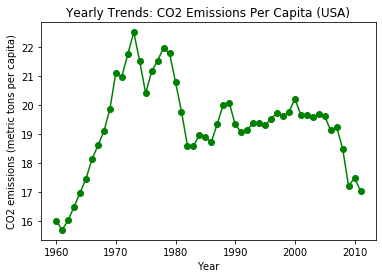

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(df.Year, df.Value, color='green', marker = 'o')
plt.xlabel("Year")
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('Yearly Trends: CO2 Emissions Per Capita (USA)')





### But how do the USA's numbers relate to those of other countries?

**Q2.3** (20 points)

- select CO2 emissions per capital for all countries in 2011
- plot a histogram of the emmissions per capita by country
- indicate the position of USA in the plot


<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Histogram: CO2 Emissions Per Capita (Worldwide)')

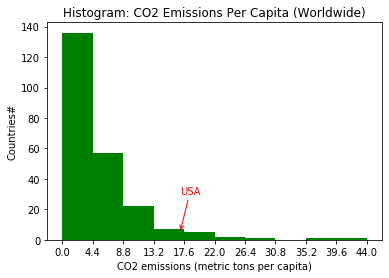

In [12]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()
df2 = world[(world.Year == 2011) & (world.IndicatorName == "CO2 emissions (metric tons per capita)")]

usa_df2 = df2.loc[df2['CountryCode']=='USA']["Value"]

counts, bins, patches = ax.hist(df2['Value'])
print(type(bins))
ax.set_xticks(bins)

#tick label
ax.annotate("USA",color = 'red',
            xy=(usa_df2, 5), xycoords='data',
            xytext=(usa_df2, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",  color = 'red'),
            )
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

#Histogram
plt.hist(df2['Value'], bins, color= 'green')
plt.xlabel("CO2 emissions (metric tons per capita)")
plt.ylabel('Countries#')
plt.title('Histogram: CO2 Emissions Per Capita (Worldwide)')


### ScatterPlot for comparing GDP against CO2 emissions (per capita) in USA

**Q2.4** (20 points)

- Select GDP Per capital for USA (Indicator = 'GDP per capita (constant 2005 US$)')
- Use a scattor plot to explore the relationship between GDP and CO2 emissions

Hint: before plotting, you have to make sure that the two measures cover the same period of time

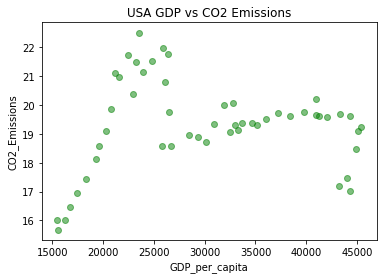

In [13]:
# YOUR CODES
df3 = world[(world.CountryName == "United States") & (world.IndicatorName == 'GDP per capita (constant 2005 US$)')]
df3 = df3.rename(columns={'Value':'GDP_per_capita', 'IndicatorName':'GDP_Indicator'})
df = df.rename(columns={'Value':'CO2_Emissions', 'IndicatorName':'CO2_Indicator'})
df4 = pd.merge(df, df3, on="Year")

# df4.head(15)
plt.scatter(df4.GDP_per_capita, df4.CO2_Emissions, alpha=0.5,  color = 'green')
plt.title('USA GDP vs CO2 Emissions')
plt.xlabel('GDP_per_capita')
plt.ylabel('CO2_Emissions')
plt.show()


## Part III: We are missing data (22 points)

The above analyses have suggested that not all countries have all indicators for all years. Thus, let's pick indicators and countries which have data over the same time range

In [14]:
# range of the three variables

countries_list = world['CountryName'].unique().tolist()
indicators_list = world['IndicatorName'].unique().tolist()

yearfilter = range(2000,2012)

**Q3.1** write a program to find **TWO** countries from **countries_list** and **ONE** indicator from **indicators_list** so that the selected two countries have records of the indicator from 2000 to 2011 (the time range is defined in **yearfilter**). (16 points)

For example, both Bermuda and Costa Rica have records of the indicator "Merchandise exports to developing economies outside region (% of total merchandise exports)" from 2000 to 2011.

Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

Expected output:
- Two dataframe, indicating the two countries separately
- The two dataframe only include data with the specific indicator
- Both dataframe cover the same period of time from 2000 to 2011

In [15]:
import random          
# Creating aggregate table of Indicators and Countries(2) with data in 2000-2011
df5 = world[(world.Year <= 2011) & (world.Year >= 2000)].groupby(['IndicatorName','CountryName'], as_index = False).count()
df6 = df5[(df5.Value ==12)]   
# Creating aggregate dataframe for Indicators with atleast 2 countries fulfilling the 12 year data condition
indicators_country = df6.groupby(['IndicatorName'], as_index = False)[['CountryName']].count()
# Creating list of Indicators from above dataframe
indicators_list = indicators_country[(indicators_country.CountryName >= 2)]['IndicatorName'].unique().tolist()
# Taking Random Indicator
random_indicator = random.choice(indicators_list)
# Taking Random 2 Countries for the given Indicator
select_countries = random.choices(list(df6[(df6['IndicatorName'] == random_indicator)].CountryName), k=2)
# Print
print("{} have all values present, in 2000-2011, for indicator: {}".format(select_countries, random_indicator) )



['Japan', 'Sri Lanka'] have all values present, in 2000-2011, for indicator: Contributing family workers, male (% of males employed)


**Q3.2** Plot the correlation of the two countries with the selected indicator (scatter plots) (6 points)

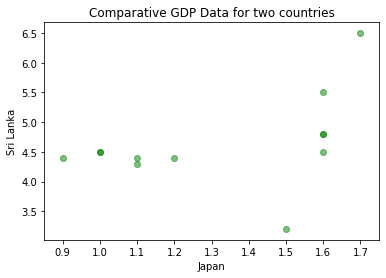

In [16]:
# YOUR CODES
df7 = world[(world.CountryName == select_countries[0]) & (world.IndicatorName == random_indicator) & (world['Year'].between(2000,2011))]
df8 = world[(world.CountryName == select_countries[1]) & (world.IndicatorName == random_indicator) & (world['Year'].between(2000,2011))]
df9 = pd.merge(df7, df8, on="Year")


plt.scatter(df9.Value_x, df9.Value_y, alpha=0.5, color = 'green')
plt.title('Comparative GDP Data for two countries')
plt.xlabel(select_countries[0])
plt.ylabel(select_countries[1])
plt.show()